<a href="https://colab.research.google.com/github/yamaniyuda/hand-drawing-clarification-rock-paper-scissors/blob/main/ksifikasi_gambar_batu_gunting_kertas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
import PIL
import zipfile
import numpy as np
import tensorflow as tf
import shutil
import matplotlib.pyplot as plt

from PIL import Image, ImageOps, ImageOps
from keras.models import load_model
from keras.preprocessing import image

In [3]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d "drgfreeman/rockpaperscissors"

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 97% 297M/306M [00:02<00:00, 145MB/s]
100% 306M/306M [00:02<00:00, 143MB/s]


In [4]:
dataset_dir = 'dataset'
os.mkdir(dataset_dir)

In [5]:
target_file = 'rockpaperscissors.zip'
extracting = zipfile.ZipFile(target_file, 'r')
extracting.extractall(dataset_dir)
extracting.close()

In [ ]:
# paper

# 80% -> training
# paper1.png
# paper2.png
# paper3.png
# ...

# 20% -> validation
# paper90.png

In [6]:
dataset_dir = os.path.join(dataset_dir, 'rps-cv-images')

In [7]:
classdir_list = ['paper', 'rock', 'scissors']

In [8]:
training_percentage = 0.9

In [10]:
traning_dataset_dir = 'training'
validation_dataset_dir = 'validation'

In [11]:
os.mkdir(traning_dataset_dir)
os.mkdir(validation_dataset_dir)

In [12]:
for dirname in classdir_list:
  classpath = os.path.join(dataset_dir, dirname)

  counter = 0
  training_length = training_percentage * len(os.listdir(classpath))

  training_classpath = os.path.join(traning_dataset_dir, dirname)
  validation_classpath = os.path.join(validation_dataset_dir, dirname)

  os.mkdir(training_classpath)
  os.mkdir(validation_classpath)

  for filename in os.listdir(classpath):
    filepath = os.path.join(classpath, filename)

    if counter < training_length:
      shutil.move(filepath, training_classpath)
    else:
      shutil.move(filepath, validation_classpath)

    counter += 1

In [13]:
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.25,
    horizontal_flip = True,
    vertical_flip = True
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)

In [15]:
training_generator = training_datagen.flow_from_directory(
    traning_dataset_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
)

Found 1970 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


In [ ]:
def imageToArray(filename):
  image = Image.open(filename)
  image_grayscale = ImageOps.grayscale(image)
  image_grayscale = image_grayscale.resize(size = (150, 150))
  image_array = np.array(image_grayscale)
  image_array = image_array / 255

  list_full = []
  for single_list in image_array:
    list_full.extend(single_list)

  return list_full

In [ ]:
print(os.listdir(rock_dir)[0])

1WuMUpzupKs67q29.png


In [ ]:
data = []
label = []

for filename in os.listdir(rock_dir):
  image_path = os.path.join(rock_dir, filename)
  image_array = imageToArray(image_path)
  data.append(image_array)
  label.append([1, 0, 0])

for filename in os.listdir(paper_dir):
  image_path = os.path.join(paper_dir, filename)
  image_array = imageToArray(image_path)
  data.append(image_array)
  label.append([0, 1, 0])

for filename in os.listdir(scissors_dir):
  image_path = os.path.join(scissors_dir, filename)
  image_array = imageToArray(image_path)
  data.append(image_array)
  label.append([0, 0, 1])

data = np.array(data)
label = np.array(label)

In [ ]:
print(data.shape)
print(label.shape)

(2188, 22500)
(2188, 3)


In [19]:
def load_img(img_path, show=False):
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255

  if show:
    plt.imshow(img_tensor[0])
    plt.axis('off')
    plt.show()

  return img_tensor

In [17]:
from keras.src.engine import input_spec
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), input_shape = (150, 150, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    metrics=['acc'],
    loss='categorical_crossentropy',
    optimizer='adam'
)

model.fit(
    training_generator,
    validation_data = validation_generator,
    epochs=5
)

Epoch 1/5
62/62 [==============================] - 38s 599ms/step - loss: 0.8894 - acc: 0.5665 - val_loss: 0.6141 - val_acc: 0.7294
Epoch 2/5
62/62 [==============================] - 37s 598ms/step - loss: 0.5963 - acc: 0.7685 - val_loss: 0.4668 - val_acc: 0.8211
Epoch 3/5
62/62 [==============================] - 35s 565ms/step - loss: 0.4379 - acc: 0.8406 - val_loss: 0.2666 - val_acc: 0.9174
Epoch 4/5
62/62 [==============================] - 37s 589ms/step - loss: 0.3045 - acc: 0.8909 - val_loss: 0.1733 - val_acc: 0.9404
Epoch 5/5
62/62 [==============================] - 36s 569ms/step - loss: 0.2498 - acc: 0.9198 - val_loss: 0.1664 - val_acc: 0.9541


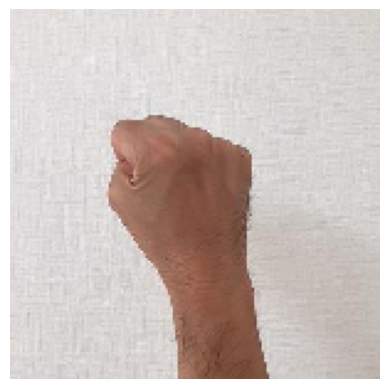

1/1 [==============================] - 0s 67ms/step
paper
[[9.9999857e-01 2.8391584e-10 1.4793471e-06]]


In [25]:
sample_image = 'batu_b.jpg'
prediction = model.predict(load_img(sample_image, show=True))
label = ['paper', 'rock', 'scissors']
max_index = np.argmax(prediction)
print(label[max_index])
print(prediction)